<a href="https://colab.research.google.com/github/Chpel/CoDA-Project/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [45]:
!pip install ucimlrepo

In [46]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [47]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [48]:
X.describe().drop(['count', '25%','50%','75%'], axis=0)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Homework 2


## Task 1

<Axes: >

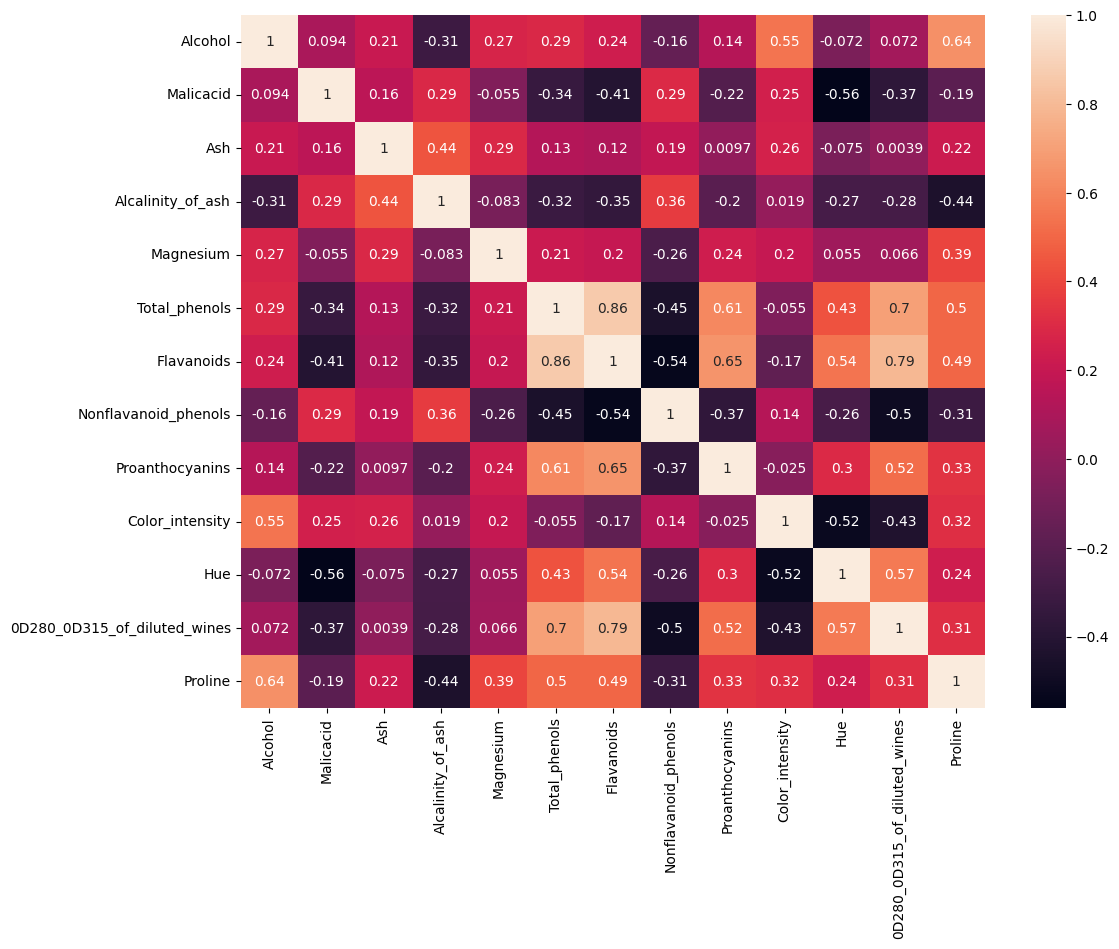

In [49]:
fig=plt.figure(figsize=(12,9))
sns.heatmap(X.corr(), annot=True)

In [50]:
pair = ('Total_phenols', 'Flavanoids')

## Task 2

<Axes: xlabel='Total_phenols', ylabel='Flavanoids'>

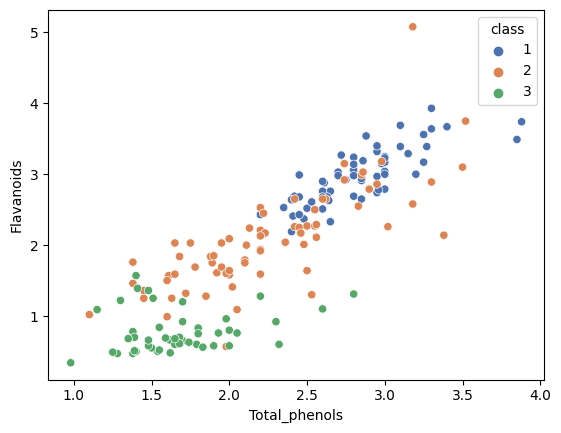

In [51]:
sns.scatterplot(data=X, x=pair[0], y=pair[1], hue=y['class'], palette='deep')

## Задание 3

In [52]:
model = LinearRegression()
model.fit(np.array(X[pair[0]]).reshape(-1,1), X[pair[1]])

LinearRegression()

In [53]:
model.coef_, model.intercept_

(array([1.37984391]), -1.1376271584040634)

## Задание 4

In [54]:
X.corr()[pair[0]][pair[1]]

0.8645635000951147

In [73]:
R2 = r2_score(X[pair[1]], model.coef_ * X[pair[0]] + model.intercept_)
R2

0.7474700456967156

## Задание 5

In [56]:
idx = np.random.randint(0, X.shape[0], 3)
idx

array([ 29,   4, 148])

In [57]:
X.loc[idx,:]

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
29,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
148,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650


In [58]:
pred = model.predict(np.array(X.loc[idx,pair[0]]).reshape(-1,1))
pred

array([2.51895921, 2.7259358 , 1.5254716 ])

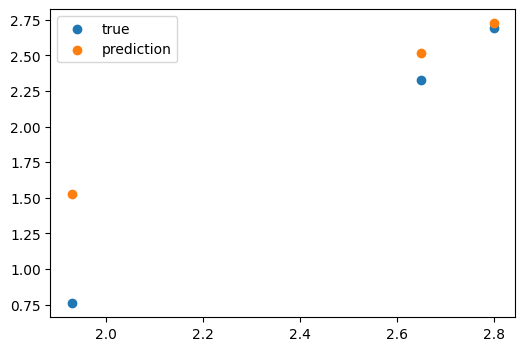

In [61]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
x0 = X.loc[idx, pair[0]]
true0 = X.loc[idx, pair[1]]
ax.scatter(x0, true0, label='true')
ax.scatter(x0, pred, label='prediction')
plt.legend()


Замечено явное смещение между предсказанием случайно выбранных объектов и истинных значений.

## Задание 6

In [67]:
print('Point of view: DA')
print('\tmean relative error on chosen objects', sum(abs(true0 - pred/true0)))
print('\tmean relative error on the whole dataset',\
      sum(abs(X.loc[:,pair[1]] - model.predict(np.array(X.loc[:,pair[0]]).reshape(-1,1))/X.loc[:,pair[1]])))

true_all = X.loc[:,pair[1]]
pred_all = model.predict(np.array(X.loc[:,pair[0]]).reshape(-1,1))
print('Point of view: ML')
print('\tmean relative error on chosen objects', sum(abs(true0 - pred/pred)))
print('\tmean relative error on the whole dataset',\
      sum(abs((true_all - pred_all) / pred_all)))


Point of view: DA
	mean relative error on chosen objects 4.172742059194176
	mean relative error on the whole dataset 255.53631188797232
Point of view: ML
	mean relative error on chosen objects 3.26
	mean relative error on the whole dataset 45.04587128403354


## Задание 7

In [74]:
r2_score(true_all, pred_all)

0.7474700456967156

In [75]:
r2_score(pred_all, true_all)

0.6621537468195111

# Homework 3